# Micro Credit Defaulter Project

In [1]:
#importing all the requred librery.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

## Examining the data

In [2]:
#reading the csv file 
df=pd.read_csv('Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [3]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

* We can see there are Object, float, integer type of data and there are no null values and more details of the dataset.

In [4]:
#checking dataset shape
df.shape

(209593, 37)

* Dataset contains 209593 rows and 37 columns

In [5]:
#checkking null value
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

* We can see there are no null values.

## Summary Statistics

In [6]:
#describing dataset
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

* There are no missing values
* The mean is more than median 50% in all the columns
* There is a large difference in 75% and max in unnamed 0.
* The one and two observation suggest there are extreme       outliers
* There are no need of Un-named columns because index value is same.

In [7]:
#checking data types
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

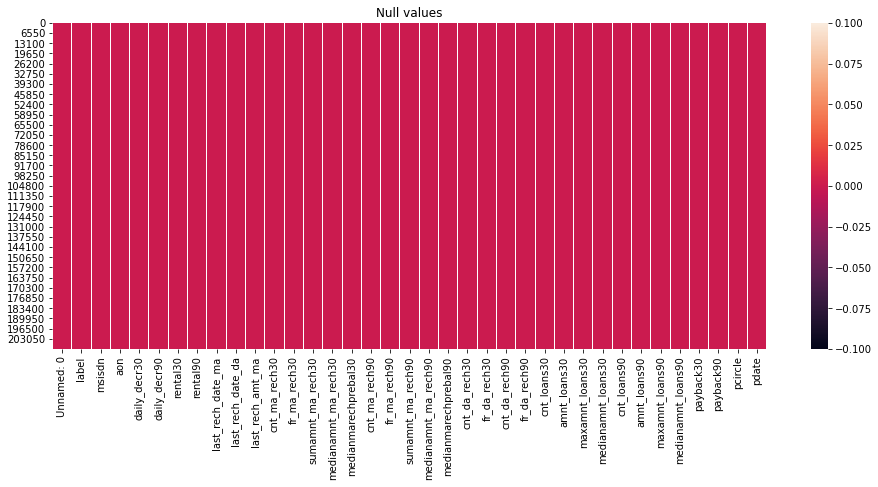

In [8]:
#ploting heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

* Here we can see null values in heatmap

In [9]:
#checking count of label
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [10]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [11]:
df['msisdn'].value_counts()

04581I85330    7
47819I90840    7
87592I84456    6
55809I89238    6
42825I88688    6
              ..
73937I88659    1
12730I84458    1
69905I89239    1
42039I88680    1
50078I82737    1
Name: msisdn, Length: 186243, dtype: int64

In [12]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [13]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [14]:
df['pdate'].unique()

array(['2016-07-20', '2016-08-10', '2016-08-19', '2016-06-06',
       '2016-06-22', '2016-07-02', '2016-07-05', '2016-08-05',
       '2016-06-15', '2016-06-08', '2016-06-12', '2016-06-20',
       '2016-06-29', '2016-06-16', '2016-08-03', '2016-06-24',
       '2016-07-04', '2016-07-03', '2016-07-01', '2016-08-08',
       '2016-06-26', '2016-06-23', '2016-07-06', '2016-07-09',
       '2016-06-10', '2016-06-07', '2016-06-27', '2016-08-11',
       '2016-06-30', '2016-06-19', '2016-07-26', '2016-08-14',
       '2016-06-14', '2016-06-21', '2016-06-25', '2016-06-28',
       '2016-06-11', '2016-07-27', '2016-07-23', '2016-08-16',
       '2016-08-15', '2016-06-02', '2016-06-05', '2016-08-02',
       '2016-07-28', '2016-07-18', '2016-08-18', '2016-07-16',
       '2016-07-29', '2016-07-21', '2016-06-03', '2016-06-13',
       '2016-08-01', '2016-07-13', '2016-07-10', '2016-06-09',
       '2016-07-15', '2016-07-11', '2016-08-09', '2016-08-12',
       '2016-07-22', '2016-06-04', '2016-07-24', '2016-

In [15]:
df['pdate'].value_counts()

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64

* Here pdate,pcircle,msisdn are the independent varibles

## EDA (univariate,bivariate and multivariate)

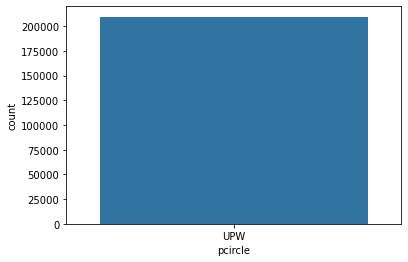

In [16]:
sns.countplot(df['pcircle']);

* All columns are equally distributed there is no imbalance issue exits

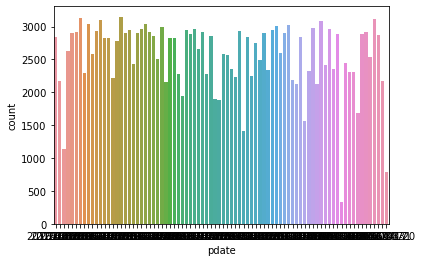

In [17]:
sns.countplot(df['pdate']);

* All columns are not equally distributed there is class imbalance issue exits

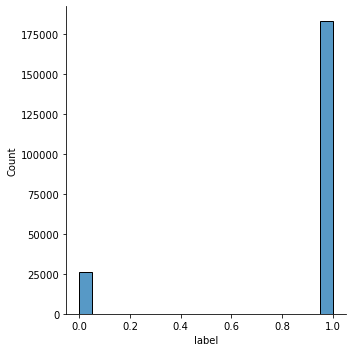

In [18]:
sns.displot(df['label'])

* here some columns are equally distributed some columns are not equally distributed because imbalance issue 

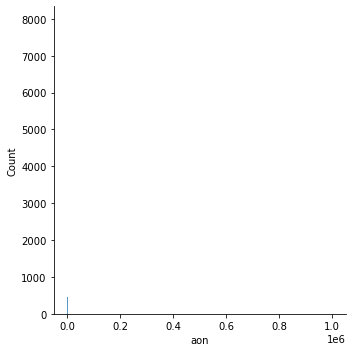

In [19]:
sns.displot(df['aon'])

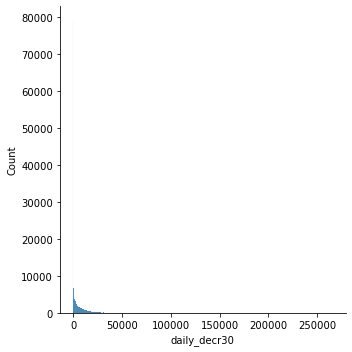

In [20]:
sns.displot(df['daily_decr30'])

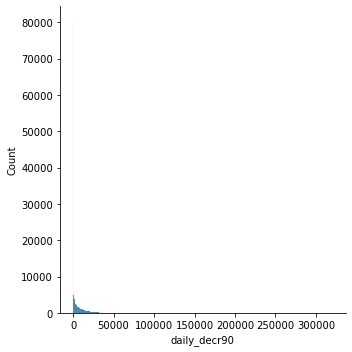

In [21]:
sns.displot(df['daily_decr90'])

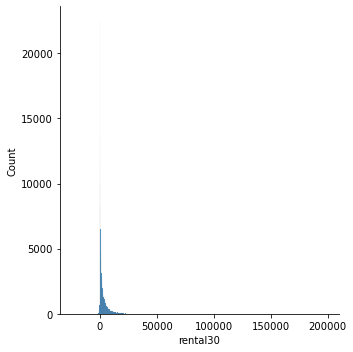

In [22]:
sns.displot(df['rental30'])

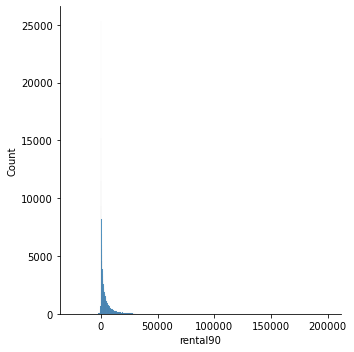

In [23]:
sns.displot(df['rental90'])

<AxesSubplot:xlabel='aon'>

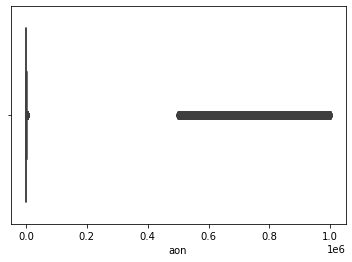

In [24]:
sns.boxplot(df["aon"])

* There is no outlet in the aon columns

<AxesSubplot:xlabel='daily_decr30'>

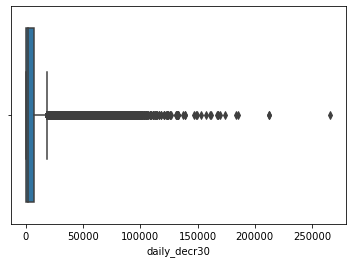

In [25]:
sns.boxplot(df["daily_decr30"])

<AxesSubplot:xlabel='daily_decr90'>

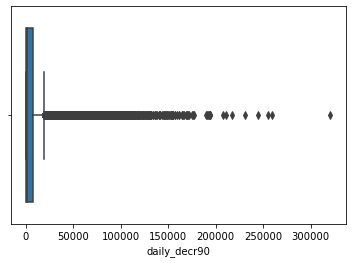

In [26]:
sns.boxplot(df["daily_decr90"])

Text(0.5, 0, 'pcircle')

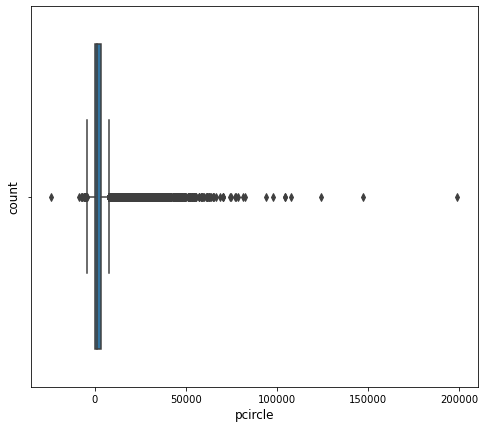

In [27]:
count = df['pcircle'].value_counts()
plt.figure(figsize=(8,7))
sns.boxplot(df["rental30"])
plt.ylabel('count',fontsize=12)
plt.xlabel('pcircle',fontsize=12)

<AxesSubplot:xlabel='rental90'>

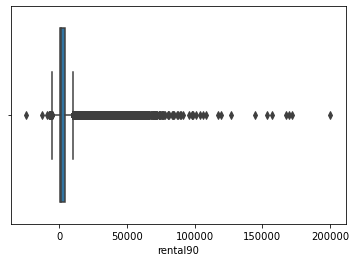

In [28]:
sns.boxplot(df["rental90"])

* There is outlet on the daily_decr30.daily_decr90,rental30,rental90  columns

## Bi Variate analysis

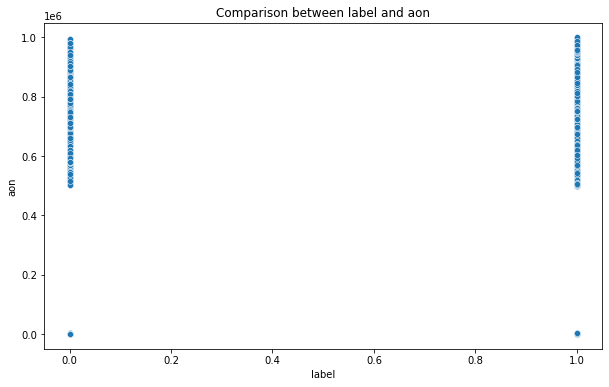

In [29]:
plt.figure(figsize=[10,6])
plt.title('Comparison between label and aon')
sns.scatterplot(df['label'],df['aon']);

* Here we can plot aon and label plot but not identified clearly

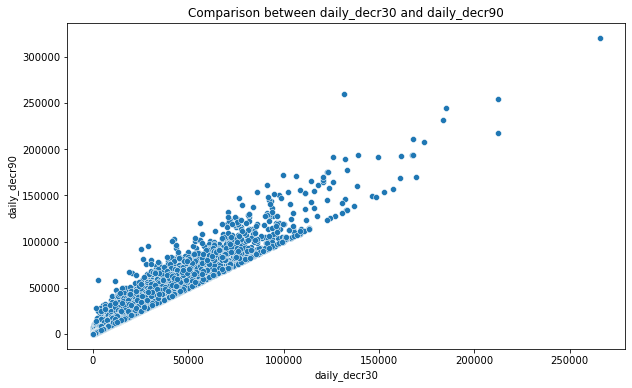

In [30]:
plt.figure(figsize=[10,6])
plt.title('Comparison between daily_decr30 and daily_decr90')
sns.scatterplot(df['daily_decr30'],df['daily_decr90']);

* Here  we can plot daily_decr30 and daily_decr90 plots

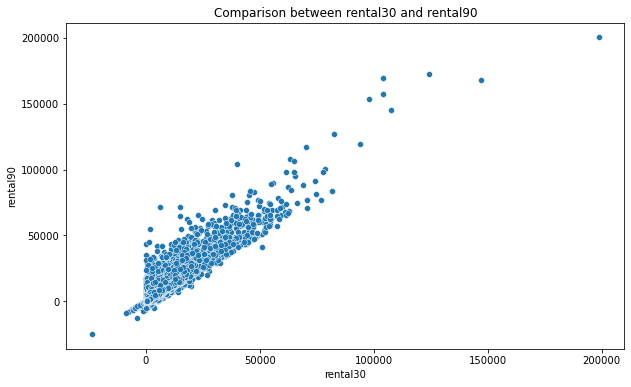

In [31]:
plt.figure(figsize=[10,6])
plt.title('Comparison between rental30 and rental90')
sns.scatterplot(df['rental30'],df['rental90']);

* Here we can plot rental30 and rental90 plots

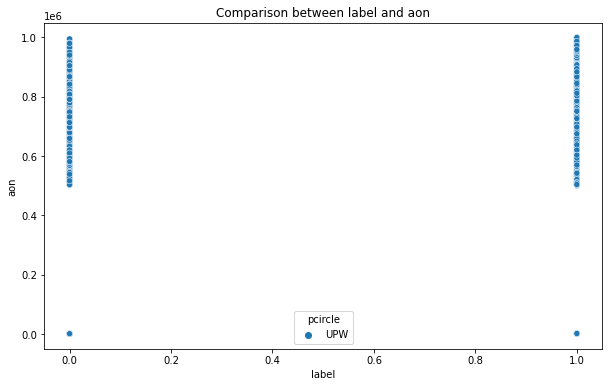

In [32]:
plt.figure(figsize=[10,6])
plt.title('Comparison between label and aon')
sns.scatterplot(df['label'],df['aon'],hue=df["pcircle"]);

* Here one more is added to aon and label that is pcircle we can easily identified here plots

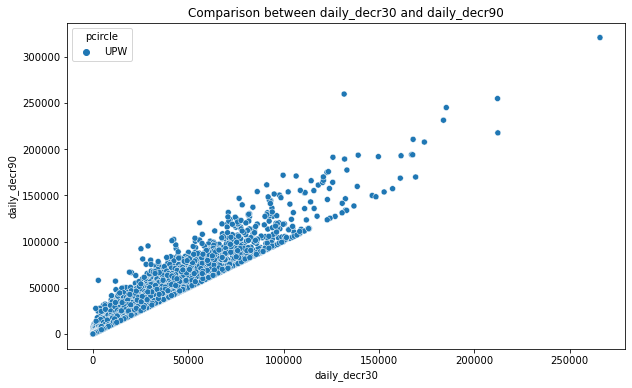

In [33]:
plt.figure(figsize=[10,6])
plt.title('Comparison between daily_decr30 and daily_decr90')
sns.scatterplot(df['daily_decr30'],df['daily_decr90'],hue=df["pcircle"]);

* Here one more is added to daily_decr30 and daily_decr90 that is pcircle we can easily identified here plots

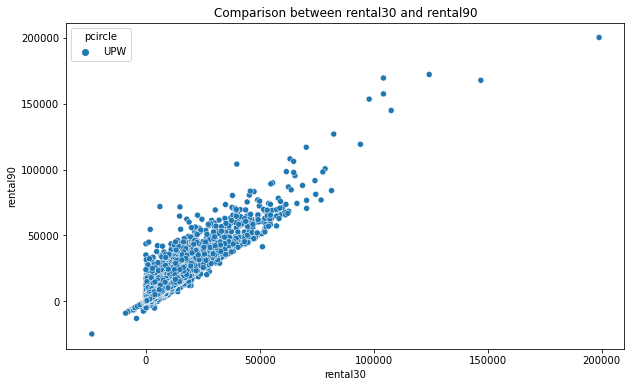

In [34]:
plt.figure(figsize=[10,6])
plt.title('Comparison between rental30 and rental90')
sns.scatterplot(df['rental30'],df['rental90'],hue=df["pcircle"]);

* Here one more is added to rental30 and rental90 that is pcircle we can easily identified here plots

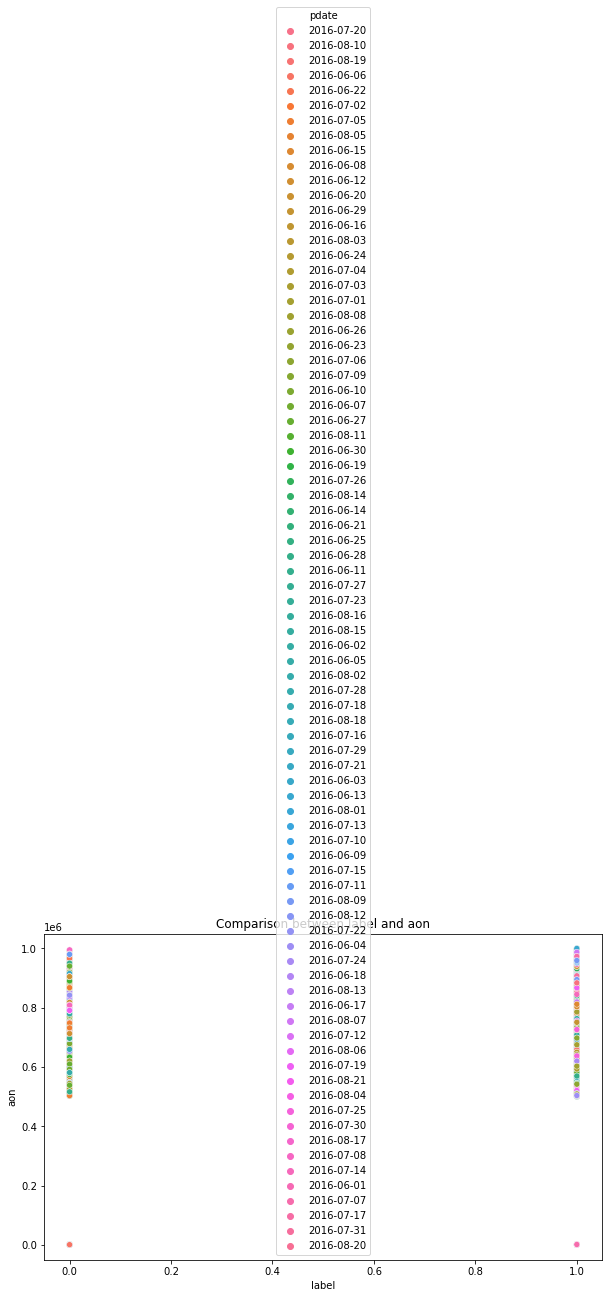

In [35]:
plt.figure(figsize=[10,6])
plt.title('Comparison between label and aon')
sns.scatterplot(df['label'],df['aon'],hue=df["pdate"]);

* Here one more is added to aon and label that is pdate we can easily identified here plots

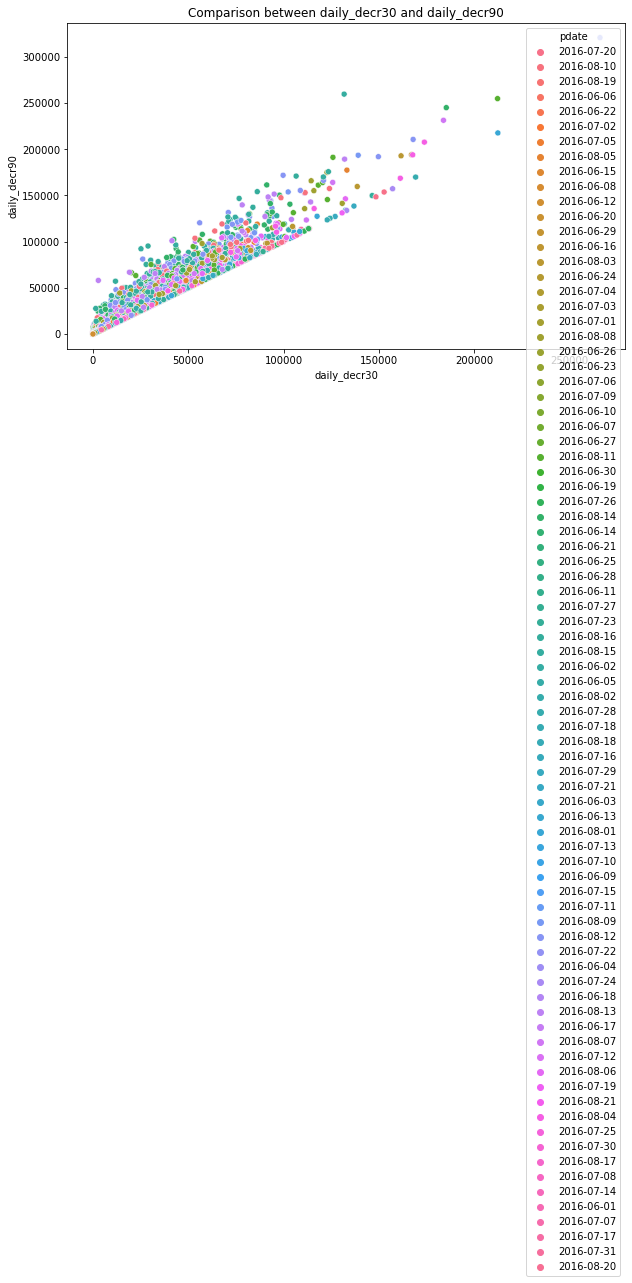

In [36]:
plt.figure(figsize=[10,6])
plt.title('Comparison between daily_decr30 and daily_decr90')
sns.scatterplot(df['daily_decr30'],df['daily_decr90'],hue=df["pdate"]);

* Here one more is added to daily_decr30 and daily_decr90 that is pdate we can easily identified here plots

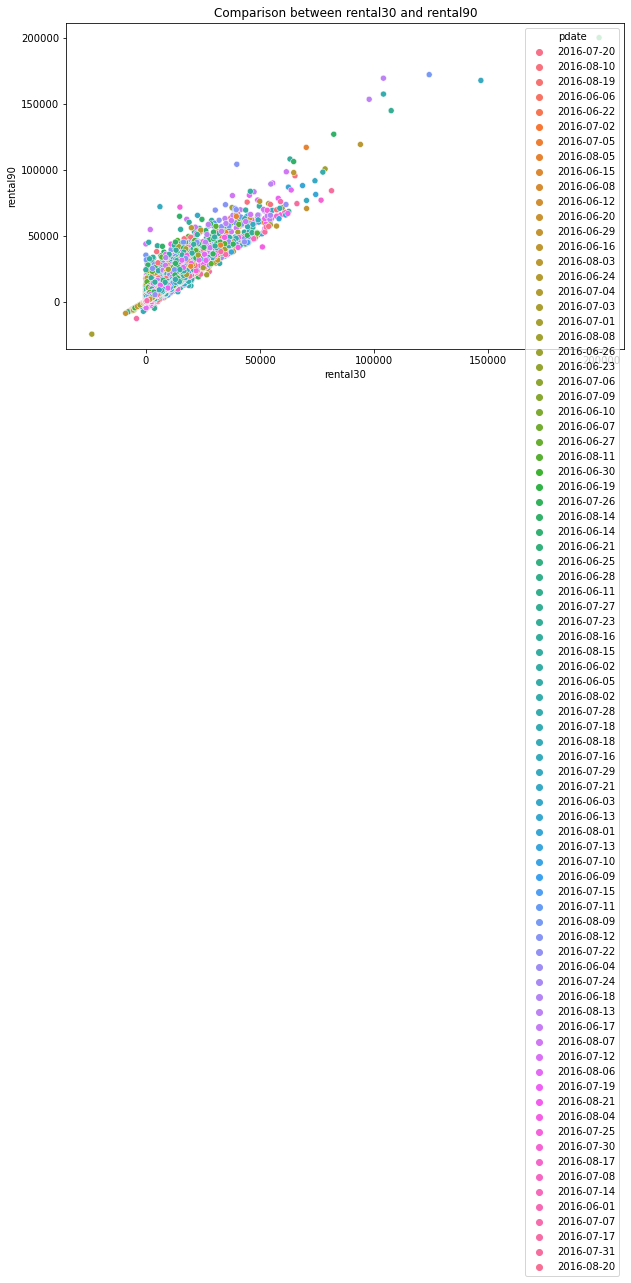

In [37]:
plt.figure(figsize=[10,6])
plt.title('Comparison between rental30 and rental90')
sns.scatterplot(df['rental30'],df['rental90'],hue=df["pdate"]);

* Here one more is added to rental30 and rental90 that is pdate we can easily identified here plots

In [38]:
#checking correlation
cor = df.corr()
cor

Unnamed: 0     label       aon  daily_decr30  \
Unnamed: 0              1.000000  0.000403 -0.002048      0.002739   
label                   0.000403  1.000000 -0.003785      0.168298   
aon                    -0.002048 -0.003785  1.000000      0.001104   
daily_decr30            0.002739  0.168298  0.001104      1.000000   
daily_decr90            0.003077  0.166150  0.000374      0.977704   
rental30               -0.003906  0.058085 -0.000960      0.442066   
rental90               -0.003459  0.075521 -0.000790      0.458977   
last_rech_date_ma      -0.001853  0.003728  0.001692      0.000487   
last_rech_date_da      -0.001133  0.001711 -0.001693     -0.001636   
last_rech_amt_ma       -0.001064  0.131804  0.004256      0.275837   
cnt_ma_rech30           0.003320  0.237331 -0.003148      0.451385   
fr_ma_rech30            0.003181  0.001330 -0.001163     -0.000577   
sumamnt_ma_rech30       0.000123  0.202828  0.000707      0.636536   
medianamnt_ma_rech30   -0.001371  0.141490  0.004306      0.295356   
medianmarechprebal30    0.001258 -0.004829  0.003930     -0.001153   
cnt_ma_rech90           0.002329  0.236392 -0.002725      0.587338   
fr_ma_rech90           -0.000249  0.084385  0.004401     -0.078299   
sumamnt_ma_rech90       0.000523  0.205793  0.001011      0.762981   
medianamnt_ma_rech90   -0.000298  0.120855  0.004909      0.257847   
medianmarechprebal90   -0.001947  0.039300 -0.000859      0.037495   
cnt_da_rech30           0.000888  0.003827  0.001564      0.000700   
fr_da_rech30           -0.002504 -0.000027  0.000892     -0.001499   
cnt_da_rech90          -0.001324  0.002999  0.001121      0.038814   
fr_da_rech90           -0.002827 -0.005418  0.005395      0.020673   
cnt_loans30             0.001725  0.196283 -0.001826      0.366116   
amnt_loans30            0.002387  0.197272 -0.001726      0.471492   
maxamnt_loans30         0.000698  0.000248 -0.002764     -0.000028   
medianamnt_loans30     -0.002005  0.044589  0.004664     -0.011610   
cnt_loans90             0.002241  0.004733 -0.000611      0.008962   
amnt_loans90            0.000781  0.199788 -0.002319      0.563496   
maxamnt_loans90         0.001742  0.084144 -0.001191      0.400199   
medianamnt_loans90     -0.002615  0.035747  0.002771     -0.037305   
payback30              -0.000040  0.048336  0.001940      0.026915   
payback90               0.002411  0.049183  0.002203      0.047175   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
Unnamed: 0                0.003077 -0.003906 -0.003459          -0.001853   
label                     0.166150  0.058085  0.075521           0.003728   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90         0.768817  0.342306  0.360601           0.002243   
medianamnt_ma_rech90      0.250518  0.110356  0.103151          -0.000726   
medianmarechprebal90      0.036

<AxesSubplot:>

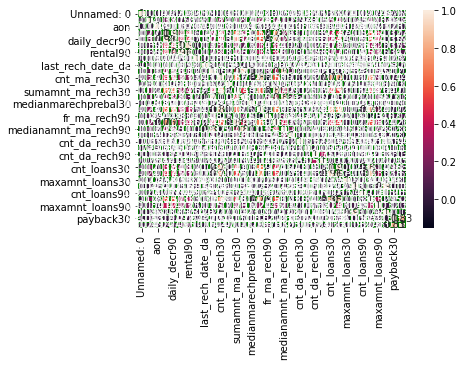

In [39]:
#checking heatmap
sns.heatmap(cor,annot=True,linewidth=1,linecolor='green')

* Here heatmap containes the difference of corresponding values of dataset.
* Light shades are higly corrolated

In [40]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["pcircle"]=LE.fit_transform(df["pcircle"])

In [41]:
df["pcircle"].unique()

array([0])

In [42]:
df["pdate"]=LE.fit_transform(df["pdate"])

In [43]:
df["pdate"].unique()

array([49, 70, 79,  5, 21, 31, 34, 65, 14,  7, 11, 19, 28, 15, 63, 23, 33,
       32, 30, 68, 25, 22, 35, 38,  9,  6, 26, 71, 29, 18, 55, 74, 13, 20,
       24, 27, 10, 56, 52, 76, 75,  1,  4, 62, 57, 47, 78, 45, 58, 50,  2,
       12, 61, 42, 39,  8, 44, 40, 69, 72, 51,  3, 53, 17, 73, 16, 67, 41,
       66, 48, 81, 64, 54, 59, 77, 37, 43,  0, 36, 46, 60, 80])

In [44]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  pdate  
0                6                 0.0  29.000000  29.000000        0     49  
1               12                 0.0   0.000000   0.000000        0     70  
2                6                 0.0   0.000000   0.000000        0     79  
3                6                 0.0   0.000000   0.000000        0      5  
4                6                 0.0   2.333333   2.333333        0     21  

[5 rows x 37 columns]

# Plotting outliers

<AxesSubplot:>

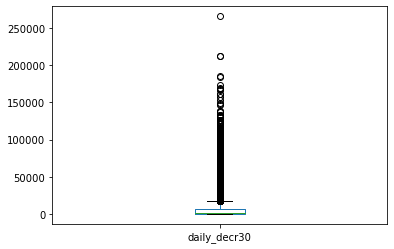

In [45]:
df["daily_decr30"].plot.box()

<AxesSubplot:>

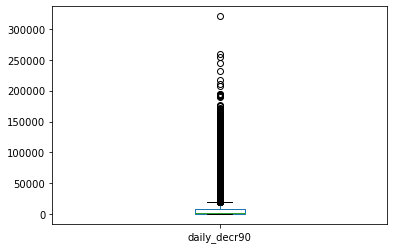

In [46]:
df["daily_decr90"].plot.box()

<AxesSubplot:>

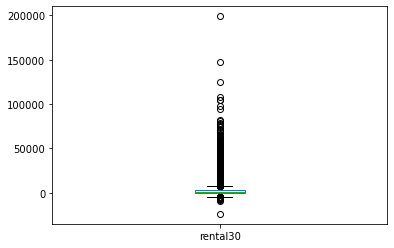

In [47]:
df["rental30"].plot.box()

<AxesSubplot:>

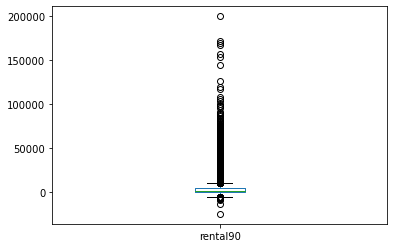

In [48]:
df["rental90"].plot.box()

<AxesSubplot:>

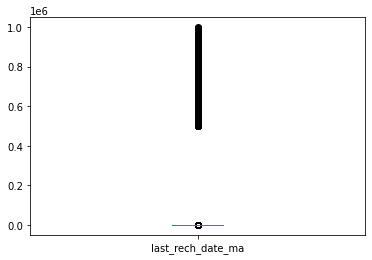

In [49]:
df["last_rech_date_ma"].plot.box()

* Here all boxplots have outside the viscous so we can find here outliers easily.

In [50]:
#checking outliers
df.shape

(209593, 37)

* Dataset contains 209593 rows and 37 columns.

### Distribution of skewness

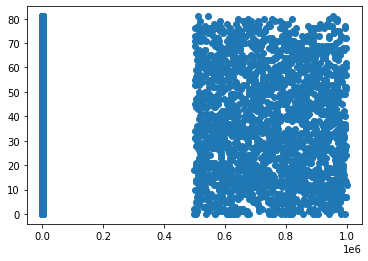

In [51]:
#checking skewness 
plt.scatter(df['aon'],df['pdate'])
plt.show()

* Here scattering of aon and pdate plot

In [52]:
df.drop('msisdn',axis=1,inplace=True)
df.head()

Unnamed: 0  label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0           1      0  272.0   3055.050000   3065.150000    220.13    260.13   
1           2      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2           3      1  535.0   1398.000000   1398.000000    900.13    900.13   
3           4      1  241.0     21.228000     21.228000    159.42    159.42   
4           5      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  pdate  
0                6                 0.0  29.000000  29.000000        0     49  
1               12                 0.0   0.000000   0.000000        0     70  
2                6                 0.0   0.000000   0.000000        0     79  
3                6                 0.0   0.000000   0.000000        0      5  
4                6                 0.0   2.333333   2.333333        0     21  

[5 rows x 36 columns]

In [53]:
df.drop('aon',axis=1,inplace=True)
df.head()

Unnamed: 0  label  daily_decr30  daily_decr90  rental30  rental90  \
0           1      0   3055.050000   3065.150000    220.13    260.13   
1           2      1  12122.000000  12124.750000   3691.26   3691.26   
2           3      1   1398.000000   1398.000000    900.13    900.13   
3           4      1     21.228000     21.228000    159.42    159.42   
4           5      1    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  pdate  
0                6                 0.0  29.000000  29.000000        0     49  
1               12                 0.0   0.000000   0.000000        0     70  
2                6                 0.0   0.000000   0.000000        0     79  
3                6                 0.0   0.000000   0.000000        0      5  
4                6                 0.0   2.333333   2.333333        0     21  

[5 rows x 35 columns]

In [54]:
pd.set_option("display.max_columns", 35)

In [55]:
#checking columns
df.columns

Index(['Unnamed: 0', 'label', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [56]:
#droping columns
df.drop([ 'pdate', 'pcircle'], axis=1, inplace = True)

## Removeing Outliers

In [57]:
#importing zscore
#removing outliers using zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73204254, 2.64789583, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [1.73202602, 0.37765836, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [1.73200949, 0.37765836, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [1.73200949, 0.37765836, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [1.73202602, 0.37765836, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [1.73204254, 0.37765836, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [58]:
z_scores = zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

new_df.head(5)

Unnamed: 0  label  daily_decr30  daily_decr90  rental30  rental90  \
0           1      0   3055.050000   3065.150000    220.13    260.13   
1           2      1  12122.000000  12124.750000   3691.26   3691.26   
2           3      1   1398.000000   1398.000000    900.13    900.13   
3           4      1     21.228000     21.228000    159.42    159.42   
4           5      1    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

In [59]:
#checking dataset shape
df.shape

(209593, 33)

* Dataset contains 209593 rows and 33 columns.

In [60]:
new_df.shape

(163063, 33)

* New dataset contains 163063 rows and 33 columns

## Feature Engineering

In [61]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [62]:
scaledX

array([[-1.73204254, -2.64789583, -0.25229941, ..., -0.22959366,
         2.9046997 ,  2.39409346],
       [-1.73202602,  0.37765836,  0.73103667, ..., -0.22959366,
        -0.38562959, -0.41923266],
       [-1.73200949,  0.37765836, -0.43201111, ..., -0.22959366,
        -0.38562959, -0.41923266],
       ...,
       [ 1.73200949,  0.37765836,  0.70079045, ..., -0.22959366,
         0.06820893, -0.04735622],
       [ 1.73202602,  0.37765836,  0.77075515, ..., -0.22959366,
        -0.38562959,  0.59938541],
       [ 1.73204254,  0.37765836, -0.09674426, ..., -0.22959366,
        -0.38562959, -0.41923266]])

In [63]:
#importing PCA
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [64]:
Y.explained_variance_ratio_

array([0.21017283, 0.09694684, 0.05919891, 0.057367  , 0.05137115,
       0.04052121, 0.03182676, 0.03068342, 0.03053299, 0.03042329,
       0.03033829, 0.03028048, 0.03022583, 0.03015283, 0.0301115 ,
       0.03006751, 0.02985192, 0.0274583 , 0.02555299, 0.02447247,
       0.0197026 , 0.01564695, 0.00886431, 0.00626263, 0.00545173,
       0.00502674, 0.00403683, 0.00263017, 0.00178286, 0.00125198,
       0.00072074, 0.00061847, 0.00044746])

In [65]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 21.01728345,  30.71196711,  36.63185843,  42.36855852,
        47.50567348,  51.55779445,  54.74047083,  57.80881283,
        60.86211216,  63.90444152,  66.93827092,  69.96631895,
        72.98890161,  76.00418454,  79.015335  ,  82.02208612,
        85.00727813,  87.75310779,  90.30840629,  92.75565305,
        94.72591255,  96.29060764,  97.17703862,  97.80330212,
        98.34847491,  98.85114928,  99.25483204,  99.51784876,
        99.69613502,  99.82133339,  99.89340762,  99.95525436,
       100.        ])

In [66]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 26


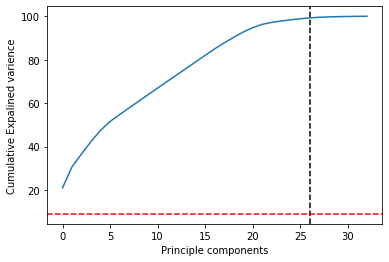

In [67]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

* Here the y label define the cumulative explained varience and x label defined the principal components

In [68]:
FinalPCA = PCA(n_components=31)
FinalData = FinalPCA.fit_transform(scaledX)

In [69]:
FinalData2=pd.DataFrame(FinalData)
FinalData2

0         1         2         3         4         5         6   \
0      -1.694825 -0.256967  2.573507 -1.562028 -2.037401 -0.121961 -1.430810   
1       0.498693  3.203512 -0.251408 -0.446935  0.597993 -0.155877 -0.788194   
2      -1.925478  0.131586 -0.525062 -0.197422  0.364923 -0.078667 -0.066261   
3      -2.074432 -0.724334 -0.579864 -0.073158  0.276157 -0.029643 -0.031478   
4       1.566482 -0.690373 -1.396193  0.004561 -1.335267  0.303416  0.414569   
...          ...       ...       ...       ...       ...       ...       ...   
209588 -0.723238  1.155540 -0.932723 -0.329802 -0.436306  0.039402 -0.100263   
209589 -0.985612 -1.035772 -0.548989 -0.052332  0.059814 -0.021037  0.142284   
209590  2.457236 -0.787026  0.560271 -0.052613  0.765694 -0.242939 -0.264650   
209591  0.875200 -0.052459  0.229479 -0.086316  0.303634  1.541960 -1.381580   
209592  0.591693  3.578981 -1.096664 -0.388322 -0.755377  0.126206 -0.025240   

              7         8         9         10        11        12        13  \
0       0.126705 -0.977235  0.434934  0.305404  0.103370  1.233328  0.550555   
1       0.252885 -0.871138  0.332026  0.096622  0.046030  1.180059  0.485634   
2       0.174223 -0.965978  0.342811  0.290278  0.132344  1.201352  0.467685   
3       0.191799 -0.943315  0.336508  0.248786  0.109626  1.201936  0.458235   
4       0.115428 -1.002262  0.331850  0.349296  0.199209  1.263309  0.419443   
...          ...       ...       ...       ...       ...       ...       ...   
209588 -0.099824  0.883834 -0.228255 -0.446292  0.118124 -1.104308 -0.591915   
209589 -0.090568  0.871180 -0.233396 -0.432839  0.128913 -1.132530 -0.615457   
209590  0.021174  0.980609 -0.257336 -0.656182  0.008303 -1.177468 -0.626533   
209591  0.030625  0.970032 -0.202667 -0.702681 -0.024089 -1.253462 -0.518763   
209592 -0.005873  0.956742 -0.268238 -0.624069  0.047049 -1.181770 -0.659373   

              14        15        16        17        18        19        20  \
0       0.125724 -0.139009 -0.631050 -0.573778 -1.267549  2.031530  0.004377   
1      -0.235148 -0.072669 -1.123520  0.876861 -1.160755 -2.044980 -0.159662   
2       0.190367 -0.199595 -0.333986  0.263425  0.578219 -0.689447 -0.038244   
3       0.110111 -0.191924 -0.470783  0.308190  0.393044 -0.728505 -0.039879   
4       0.306335 -0.310144 -0.124094 -0.977888 -0.299321 -0.500398 -0.023650   
...          ...       ...       ...       ...       ...       ...       ...   
209588 -0.055297  0.137875  0.600472 -0.529060  0.290217 -0.724749 -0.050130   
209589 -0.004835  0.116359  0.703717 -0.026867  0.260227 -0.508485 -0.052566   
209590 -0.470839  0.225298 -0.134912  0.988617 -1.438378 -1.232342 -0.186863   
209591 -0.529441  0.349372 -0.320203  2.022798 -0.441983 -0.801455  1.637896   
209592 -0.381261  0.191518  0.007203  1.101030 -2.077977 -1.218570 -0.159383   

              21        22        23        24        25        26        27  \
0       0.053612 -0.158498 -0.018173  0.006827 -0.389779 -0.000986  0.000640   
1      -0.048520 -0.408975 -0.183012 -0.786572 -0.315360  0.044332 -0.005272   
2      -0.234588  0.091424 -0.050013 -0.076877 -0.029753 -0.031878  0.004625   
3      -0.472107  0.265438  0.181969  0.252944  0.073606  0.241375  0.003531   
4       0.129492  0.937678 -0.020521  0.182932  0.138309  0.277018  0.033944   
...          ...       ...       ...       ...       ...       ...       ...   
209588  0.151810  0.075428  0.142954  0.045690  0.013576 -0.093407  0.010474   
209589  0.013328  0.025059 -0.038332 -0.057710 -0.023022  0.002625 -0.003672   
209590  0.298288  0.077386 -0.126049  0.179469 -0.054812  0.013478 -0.080532   
209591  0.919381  0.203103 -0.100365 -0.329823  0.559565  0.663489  0.017352   
209592  0.480399 -0.603412  0.319635  0.137806 -0.088163  0.873721  0.020882   

              28        29        30  
0      -0.018110  0.061380 -0.001168  
1       0.088682 -0.116706 -0.094091  
2       0.029159 -0.018645  0.017754  
3      -0.0570

## Data Visualization

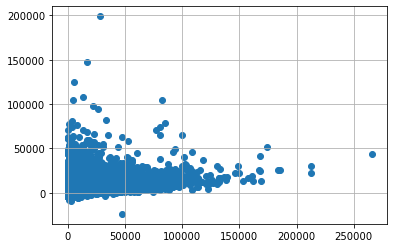

In [70]:
var = 'daily_decr30'
plt.scatter(x = df['daily_decr30'],y = df['rental30'],)
plt.grid(True)

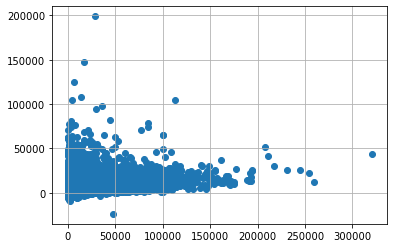

In [71]:
var = 'daily_decr90'
plt.scatter(x = df['daily_decr90'],y = df['rental30'],)
plt.grid(True)

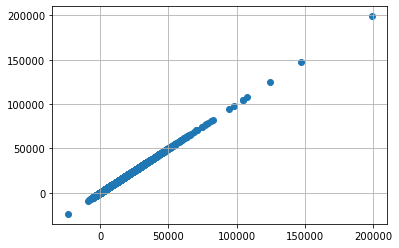

In [72]:
var = 'rental30'
plt.scatter(x = df['rental30'],y = df['rental30'],)
plt.grid(True)

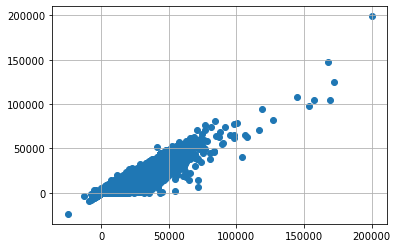

In [73]:
var = 'rental90'
plt.scatter(x = df['rental90'],y = df['rental30'],)
plt.grid(True)

## Classification Method

In [74]:
#importing train test split method
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [75]:
x = df.drop(['label'],axis=1)
y = df["label"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)

In [76]:
#wring for loop for train test split method
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)

86.58589480380535 at random_state 0
86.54252089176762 at random_state 1
86.37625422895643 at random_state 2
86.55119567417518 at random_state 3
86.36324205534511 at random_state 4
86.57288263019403 at random_state 5
86.51360495040916 at random_state 6
86.40806176445074 at random_state 7
86.46444785009976 at random_state 8
86.68565480149206 at random_state 9
86.38926640256773 at random_state 10
86.42974872046959 at random_state 11
86.37047104068472 at random_state 12
86.4731226325073 at random_state 13
86.55987045658271 at random_state 14
86.48324321198277 at random_state 15
86.5830032096695 at random_state 16
86.42830292340167 at random_state 17
86.33866350519041 at random_state 18
86.47601422664314 at random_state 19
86.38926640256773 at random_state 20
86.28661481074516 at random_state 21
86.56565364485441 at random_state 22
86.52950871815632 at random_state 23
86.42107393806205 at random_state 24
86.5280629210884 at random_state 25
86.47023103837145 at random_state 26
86.26492785472

* The random state can be increase and decrasing

In [77]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.46      0.49      0.47      8609
           1       0.93      0.92      0.92     60557

    accuracy                           0.86     69166
   macro avg       0.69      0.70      0.70     69166
weighted avg       0.87      0.86      0.87     69166

Test Accuracy:86.44%


* The test accuracy value of decision tree classifier is 86.44%

In [78]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       0.58      0.03      0.06      8609
           1       0.88      1.00      0.93     60557

    accuracy                           0.88     69166
   macro avg       0.73      0.51      0.50     69166
weighted avg       0.84      0.88      0.83     69166

Test Accuracy:87.66%


* The test accuracy value og logistic regression is 87.66%

In [79]:
#GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.20      0.88      0.33      8609
           1       0.97      0.50      0.66     60557

    accuracy                           0.55     69166
   macro avg       0.58      0.69      0.49     69166
weighted avg       0.87      0.55      0.62     69166

Test Accuracy:54.63%


* The test acuuracy of navie byes classifier is 54.63%

In [80]:
#RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.76      0.43      0.55      8609
           1       0.92      0.98      0.95     60557

    accuracy                           0.91     69166
   macro avg       0.84      0.71      0.75     69166
weighted avg       0.90      0.91      0.90     69166

Test Accuracy:91.22%


* The test accuracy of random forest classifier is 91.22%

## Cross value correction

In [81]:
#importing  cross validation
from sklearn.model_selection import cross_val_score

In [82]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7433830443147382


In [83]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.8760740976123002


In [84]:
print(cross_val_score(nb,x,y,cv=5).mean())

0.5495555904899445


In [85]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.9075063868861684


## Hyperparameter Tunning

In [86]:
#iporting GridSearchCV
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {
    'bootstrap':[True,False],
    'max_depth':[2,3,4],
    'max_features':['auto'],
    'min_samples_leaf':[3,5,7,10,20,40,50],
    'min_samples_split':[5,10,20,40,50],
    'n_estimators':[50,100,150,200]
}

In [88]:
rf = RandomForestClassifier()

In [89]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [ ]:
rf_cv.fit(x,y)

## AUC ROC Curve

In [91]:
#importing ROC AUC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [92]:
y_pred_rf = lr.predict_proba(x_test)[:,1]
y_pred_rf

array([0.98956514, 1.        , 0.99715999, ..., 0.86595061, 0.99999525,
       0.40397635])

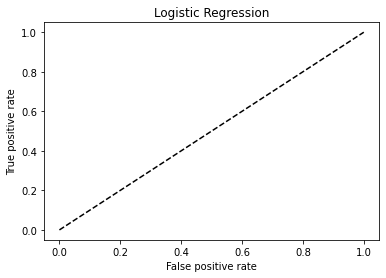

In [93]:
plt.plot([0,1],[0,1],'k--')
plt.plot(label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

## Evaluateing The Model

In [94]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.20521643582107


## Saving The Model

In [95]:
import joblib
joblib.dump(Final_mod,"Micro Credit Loan Prediction.csv")

['Micro Credit Loan Prediction.csv']

## Prediction Method

In [96]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
preds = rf.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


* The train and test data is balanced most classification methods hit the 91% accuracy with the datset.